In [59]:
import mmh3

### Count-min sketch

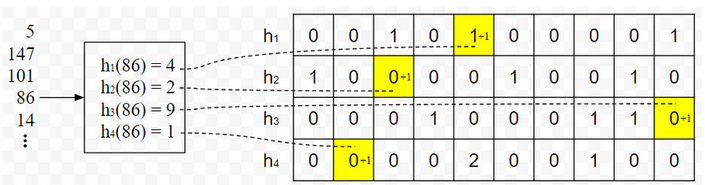

In [64]:
import math
import struct
import types


class CountMinSketch:
    DEFAULT_DELTA = 0.01
    DEFAULT_EPSILON = 0.01

    def __init__(self, delta=None, epsilon=None, width=None, depth=None, multiset=None):
        if delta is None and epsilon is None:
            delta = CountMinSketch.DEFAULT_DELTA
            epsilon = CountMinSketch.DEFAULT_EPSILON

        if width is None and depth is None:
            width = math.ceil(math.exp(1.0) / epsilon)
            depth = math.ceil(math.log(1.0 / delta))

        if multiset is None:
            multiset = [[0] * width for _ in range(depth)]

        self.w = width
        self.d = depth
        self.multiset = multiset

    def get_width(self):
        return self.w

    def get_depth(self):
        return self.d

    def get_size_in_bytes(self):
        return ((self.w * self.d) + 2) * (struct.calcsize("i") // 8)

    def set(self, key, inc):
        if isinstance(key, int):
            key= CountMinSketch.int_to_byte_array_le(key)
        else:
            key= key.encode()
        for i in range(1, self.d + 1):
            pos = mmh3.hash(key, i) % self.w
            self.multiset[i - 1][pos] += 1

    def set_string(self, val, inc):
        self.set(val.encode(), inc)

    @staticmethod
    def int_to_byte_array_le(val):
        return val.to_bytes(4, "little", signed=True)

    def get_estimated_count(self, val):
        min_val = float("inf")
        if isinstance(val, int):
            val= CountMinSketch.int_to_byte_array_le(val)
        else:
            val=val.encode()
        for i in range(1, self.d + 1):
            pos = mmh3.hash(val, i) % self.w
            min_val = min(min_val, self.multiset[i - 1][pos])

        return min_val


    

In [65]:
cms = CountMinSketch(width=100, depth=5)

In [66]:
cms.set("Ad",1)
cms.set("DD",1)

In [68]:
cms.get_estimated_count("DD")

1